In [15]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

In [62]:
path="soccer.sqlite"
conn=sql.connect(path)

In [63]:
tables= pd.read_sql("""
SELECT *
FROM sqlite_master
WHERE type= 'table'
""", conn)

In [64]:
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [65]:
query="""
SELECT *
FROM Country"""

country= pd.read_sql(query, conn)
country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [17]:
query="""
SELECT *
FROM League"""

league= pd.read_sql(query, conn)
league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [21]:
query= """
SELECT *
FROM League as l INNER JOIN Country as c
ON l.id=c.id """

leagues= pd.read_sql(query, conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


In [26]:
query= """
SELECT *
FROM Team
ORDER BY team_long_name
LIMIT 10
"""

team= pd.read_sql(query, conn)
team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


In [36]:
query= """
SELECT *
FROM Match
LIMIT 10
"""

Match= pd.read_sql(query, conn)
Match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


In [50]:
query= """
SELECT Country.name as Country, League.name as League,season,HomeTeam.team_long_name AS Home_Team,AwayTeam.team_long_name AS Away_Team, home_team_goal, away_team_goal
FROM Match
INNER JOIN Country ON Country.id=Match.country_id
INNER JOIN League ON League.id= Match.league_id
LEFT JOIN Team AS HomeTeam ON HomeTeam.team_api_id= Match.home_team_api_id
LEFT JOIN Team AS AwayTeam ON AwayTeam.team_api_id= Match.away_team_api_id
WHERE Country="Spain"
ORDER BY date
LIMIT 10
"""

Match= pd.read_sql(query, conn)
Match

,Country,League,season,Home_Team,Away_Team,home_team_goal,away_team_goal
0,Spain,Spain LIGA BBVA,2008/2009,Valencia CF,RCD Mallorca,3,0
1,Spain,Spain LIGA BBVA,2008/2009,RCD Espanyol,Real Valladolid,1,0
2,Spain,Spain LIGA BBVA,2008/2009,CA Osasuna,Villarreal CF,1,1
3,Spain,Spain LIGA BBVA,2008/2009,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,Spain,Spain LIGA BBVA,2008/2009,CD Numancia,FC Barcelona,1,0
5,Spain,Spain LIGA BBVA,2008/2009,Racing Santander,Sevilla FC,1,1
6,Spain,Spain LIGA BBVA,2008/2009,Real Sporting de Gijón,Getafe CF,1,2
7,Spain,Spain LIGA BBVA,2008/2009,Real Betis Balompié,RC Recreativo,0,1
8,Spain,Spain LIGA BBVA,2008/2009,Athletic Club de Bilbao,UD Almería,1,3
9,Spain,Spain LIGA BBVA,2008/2009,Atlético Madrid,Málaga CF,4,0


In [70]:
query="""
SELECT Country.name as Country_name, League.name AS League_name, season, COUNT(distinct stage) AS number_of_stages, COUNT(distinct HomeTeam.team_long_name) AS teams, AVG(home_team_goal), AVG(away_team_goal), AVG(home_team_goal-away_team_goal) AS average_goal_difference, AVG(home_team_goal+away_team_goal) AS average_goals, SUM(home_team_goal+away_team_goal) AS total_goals
FROM Match
INNER JOIN Country ON Country.id=Match.country_id
INNER JOIN League ON League.id=Match.league_id
LEFT JOIN Team AS HomeTeam ON HomeTeam.team_api_id= Match.home_team_api_id
LEFT JOIN Team AS AwayTeam ON AwayTeam.team_api_id= Match.away_team_api_id
WHERE Country_name in ( "England", "Spain", "Germany", "France", "Italy")
GROUP BY Country_name, season, League_name
"""

info= pd.read_sql(query, conn)
info.head()

,Country_name,League_name,season,number_of_stages,teams,AVG(home_team_goal),AVG(away_team_goal),average_goal_difference,average_goals,total_goals
0,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
1,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
2,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
3,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
4,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063


In [87]:
info.to_csv('football.csv')

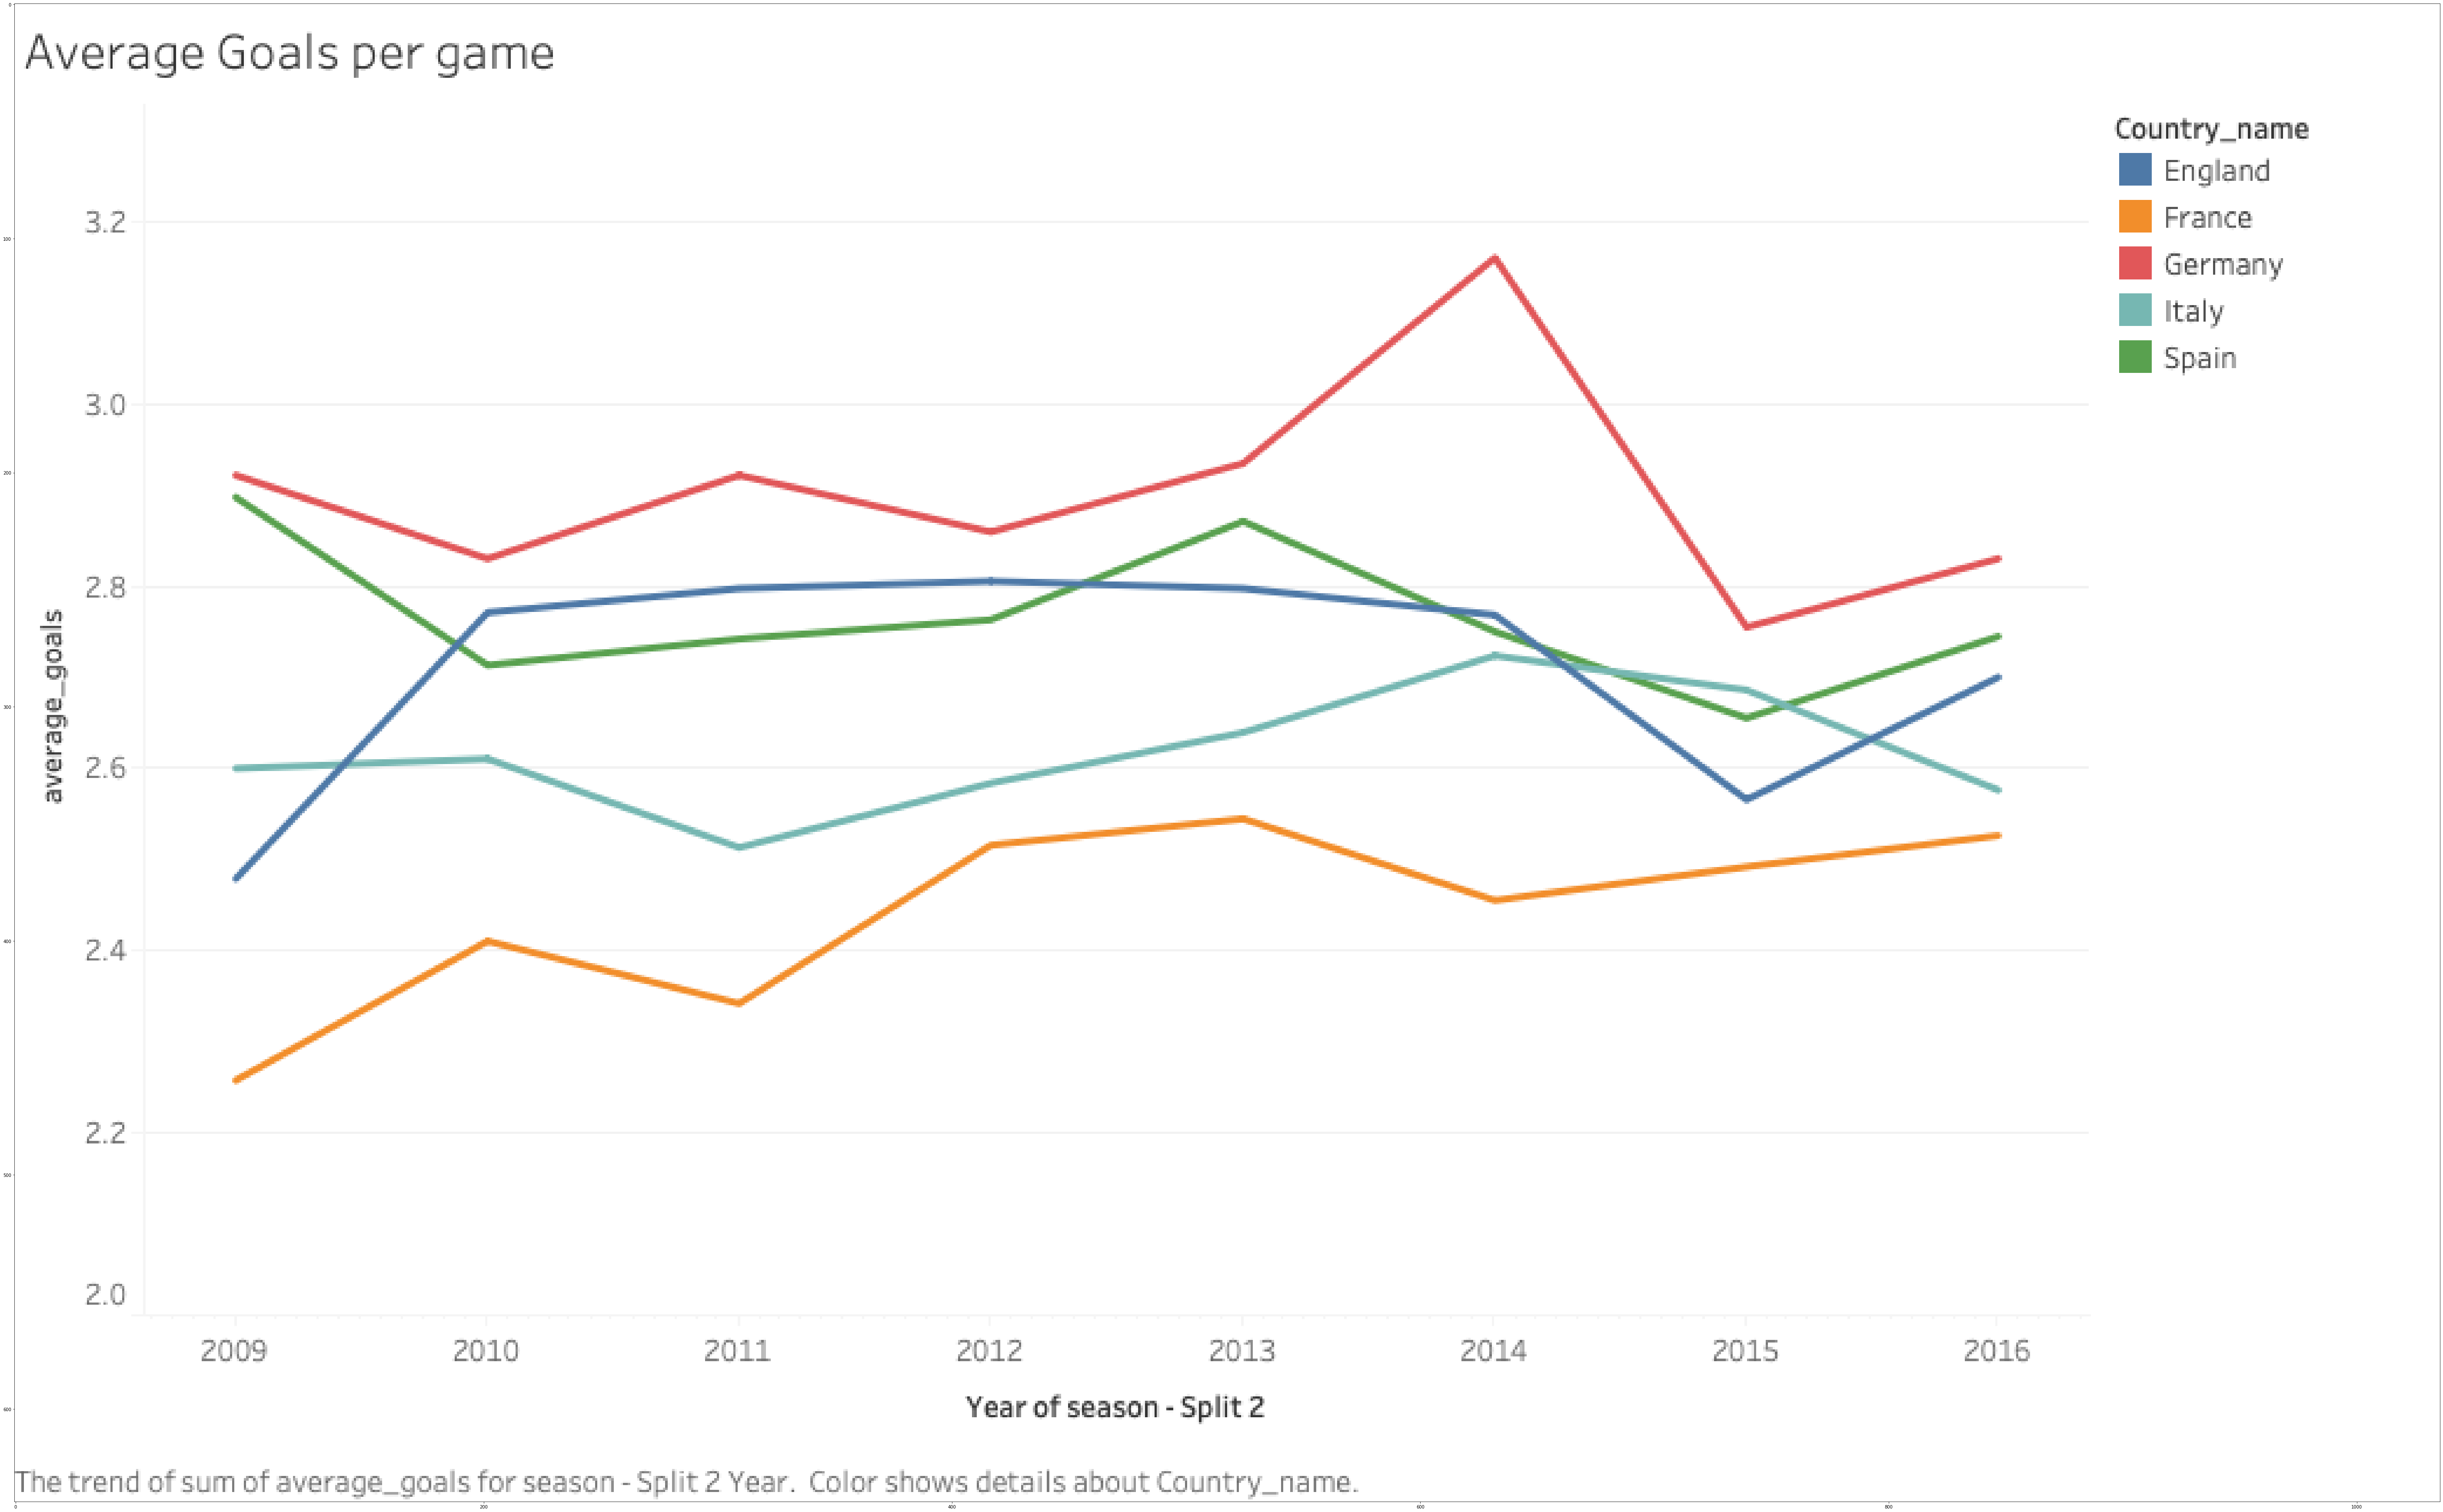

In [110]:
plt.figure(figsize = (100,100))
img=plt.imread("AVG Goals.png")
plt.imshow(img, aspect='equal',interpolation='nearest')

In [57]:
query="""
SELECT *
FROM Player
"""

player=pd.read_sql(query, conn)
player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [58]:
query="""
SELECT *
FROM player_attributes
LIMIT 5
"""

attributes=pd.read_sql(query, conn)
attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67,71,right,medium,medium,49,...,54,48,65,69,69,6,11,10,8,8
1,2,218353,505942,2015-11-19 00:00:00,67,71,right,medium,medium,49,...,54,48,65,69,69,6,11,10,8,8
2,3,218353,505942,2015-09-21 00:00:00,62,66,right,medium,medium,49,...,54,48,65,66,69,6,11,10,8,8
3,4,218353,505942,2015-03-20 00:00:00,61,65,right,medium,medium,48,...,53,47,62,63,66,5,10,9,7,7
4,5,218353,505942,2007-02-22 00:00:00,61,65,right,medium,medium,48,...,53,47,62,63,66,5,10,9,7,7


In [59]:
query="""
WITH temp AS 
(SELECT player_api_id,  AVG(overall_rating) AS avg_rating, AVG(potential) AS avg_potential
FROM player_attributes
GROUP BY player_api_id)
SELECT COUNT(Player.player_api_id),CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height , AVG(weight), temp.avg_rating, temp.avg_potential
FROM Player
LEFT JOIN temp ON Player.player_api_id=temp.player_api_id
GROUP BY calc_height
"""

playerinfo=pd.read_sql(query, conn)
playerinfo

,COUNT(Player.player_api_id),calc_height,AVG(weight),avg_rating,avg_potential
0,74,165.0,139.459459,79.769231,82.000000
1,118,168.0,144.127119,65.588235,73.941176
2,403,170.0,147.799007,66.969697,74.484848
3,530,173.0,152.824528,60.571429,76.000000
4,1188,175.0,156.111953,67.052632,69.421053
5,1489,178.0,160.665547,78.500000,84.675000
6,1388,180.0,165.261527,68.285714,73.571429
7,1954,183.0,170.167861,63.600000,67.600000
8,1278,185.0,174.636933,64.000000,69.000000
9,1305,188.0,179.278161,62.250000,70.000000


In [60]:
playerinfo.to_csv("playerpotential.csv")

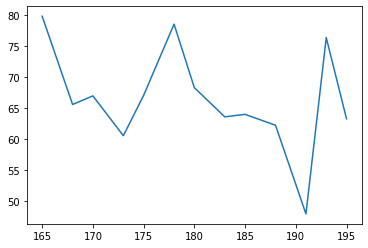

In [61]:
plt.plot(playerinfo["calc_height"], playerinfo["avg_rating"])